## T/UDOM/2017/23979

## DATA COLLECTION

In [1]:
## import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Load dataset (training dataset)
df_contdrop = pd.read_csv('C:/Users/Munily/Desktop/continue_drop/train_data_week_1_challenge.csv')
df_contdrop.head(10)


,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0
5,continue,s18221,M,BC,0.462,0.450,0.462,0,10,father,True,382,470,71.0,1896.0
6,continue,s00031,F,BC,0.779,0.701,0.779,4,2,mother,True,338,145,2.0,1929.0
7,continue,s18731,F,SC,0.566,0.495,0.566,0,4,father,True,348,80,14.0,1871.0
8,continue,s02140,M,BC,0.966,0.806,0.966,4,10,mother,True,385,193,2.0,1989.0
9,continue,s12350,F,BC,0.646,0.804,0.646,8,0,mother,True,387,113,4.0,2014.0


In [3]:
## Load dataset(testing dataset)
import pandas as pd
test = pd.read_csv('C:/Users/Munily/Desktop/continue_drop/test_data_week_1_challenge.csv')

In [4]:
## print out the first five rows
test.head()

,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,s00529,F,BC,0.212,0.601,0.212,1,4,mother,False,341,430,44.0,1959.0
1,s13519,F,BC,0.511,0.551,0.511,1,5,mother,True,329,275,60.0,1914.0
2,s01753,M,BC,0.890,0.644,0.890,2,2,mother,True,390,140,14.0,1972.0
3,s00034,F,BC,0.355,0.373,0.355,7,4,mother,True,336,206,17.0,1940.0
4,s03027,F,BC,0.691,0.147,0.691,4,3,father,True,361,287,15.0,1992.0


In [5]:
## print out the data type of each column
test.dtypes

student_id             object
gender                 object
caste                  object
mathematics_marks     float64
english_marks         float64
science_marks         float64
science_teacher         int64
languages_teacher       int64
guardian               object
internet                 bool
school_id               int64
total_students          int64
total_toilets         float64
establishment_year    float64
dtype: object

In [6]:
## Looking for non_null_values in each column
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 14 columns):
student_id            1910 non-null object
gender                1910 non-null object
caste                 1910 non-null object
mathematics_marks     1910 non-null float64
english_marks         1910 non-null float64
science_marks         1910 non-null float64
science_teacher       1910 non-null int64
languages_teacher     1910 non-null int64
guardian              1910 non-null object
internet              1910 non-null bool
school_id             1910 non-null int64
total_students        1910 non-null int64
total_toilets         1884 non-null float64
establishment_year    1884 non-null float64
dtypes: bool(1), float64(5), int64(4), object(4)
memory usage: 195.9+ KB


In [7]:
## print summation of null vallues in each column
test.isnull().sum()

student_id             0
gender                 0
caste                  0
mathematics_marks      0
english_marks          0
science_marks          0
science_teacher        0
languages_teacher      0
guardian               0
internet               0
school_id              0
total_students         0
total_toilets         26
establishment_year    26
dtype: int64

In [8]:
test['internet'].value_counts()

True     1603
False     307
Name: internet, dtype: int64

In [9]:
test['guardian'].value_counts()

mother    1362
father     432
other       84
mixed       32
Name: guardian, dtype: int64

In [10]:
test['caste'].value_counts()

BC    1010
SC     514
OC     284
ST     102
Name: caste, dtype: int64

In [11]:
test['gender'].value_counts()

F    982
M    928
Name: gender, dtype: int64

## DATA CLEANING
for test dataset

In [12]:
## Change the boolean value in column internet
test = test.applymap(lambda x: 1 if x == True else x)
test = test.applymap(lambda x: 0 if x == False else x)

In [13]:
# Change the categorical varable of norminal type into 1 and 0 of gender column
test['gender'] = [1 if x == 'M' else 0 for x in test['gender']]

In [14]:
## Using oneHotencoder by finding the dummies variables of caste column
#caste = pd.get_dummies(test['caste'])
#aste.head()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
caste = lb.fit_transform(test['caste'])
test['caste'] = caste

In [15]:
## Using oneHotencoder by finding the dummies variables of guardian column
#guardian = pd.get_dummies(test['guardian'])
#guardian.head()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
guardian = lb.fit_transform(test['guardian'])
test['guardian'] = guardian

In [16]:
## Then concatenate the new columns in test dataframe
#test = pd.concat([test,caste,guardian], axis=1)
test.head()

,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,s00529,0,0,0.212,0.601,0.212,1,4,2,0,341,430,44.0,1959.0
1,s13519,0,0,0.511,0.551,0.511,1,5,2,1,329,275,60.0,1914.0
2,s01753,1,0,0.890,0.644,0.890,2,2,2,1,390,140,14.0,1972.0
3,s00034,0,0,0.355,0.373,0.355,7,4,2,1,336,206,17.0,1940.0
4,s03027,0,0,0.691,0.147,0.691,4,3,0,1,361,287,15.0,1992.0


In [17]:
## Drop the column that has not effect in target and column that change to 1 and 0
test.drop('student_id', axis=1,inplace=True)
#test.drop('caste', axis=1,inplace=True)
#test.drop('guardian', axis=1,inplace=True)

In [18]:
## Print to see 5 rows
#test.head()

In [19]:
## Change the values in each columns of marks by multply by 100 to get more understandable column
test['mathematics_marks']*=100
test['english_marks']*=100
test['science_marks']*=100

In [20]:
## Rename the columnns to get more usefuly table explanations
test.rename(columns = {'establishment_year':'year',
                              'mathematics_marks':'math_marks',
                               'english_marks':'lg_marks',
                                'science_marks':'sc_marks',
                                 'science_teacher':'sc_teacher','languages_teacher':'lg_teacher',
                                }, inplace=True)

In [21]:
test.head()

,gender,caste,math_marks,lg_marks,sc_marks,sc_teacher,lg_teacher,guardian,internet,school_id,total_students,total_toilets,year
0,0,0,21.2,60.1,21.2,1,4,2,0,341,430,44.0,1959.0
1,0,0,51.1,55.1,51.1,1,5,2,1,329,275,60.0,1914.0
2,1,0,89.0,64.4,89.0,2,2,2,1,390,140,14.0,1972.0
3,0,0,35.5,37.3,35.5,7,4,2,1,336,206,17.0,1940.0
4,0,0,69.1,14.7,69.1,4,3,0,1,361,287,15.0,1992.0


In [22]:
## check if there null values in each columns
test.isnull().sum()

gender             0
caste              0
math_marks         0
lg_marks           0
sc_marks           0
sc_teacher         0
lg_teacher         0
guardian           0
internet           0
school_id          0
total_students     0
total_toilets     26
year              26
dtype: int64

In [23]:
## check the total null values in all columns
test.isnull().sum().sum()

52

In [24]:
## Drop those rows since must be not equal to zero
test.dropna(inplace=True)

In [25]:
test.isnull().sum().sum()

0

In [26]:
## Check for number of rows remaining
test.shape

(1884, 13)

## Then for the train dataset

In [27]:
## Check for the number of rows and columns in train dataset
df_contdrop.shape

(17190, 15)

In [28]:
df_contdrop.columns

Index(['continue_drop', 'student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'],
      dtype='object')

In [29]:
## Check for the data type as well as nun values
df_contdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17190 entries, 0 to 17189
Data columns (total 15 columns):
continue_drop         17190 non-null object
student_id            17190 non-null object
gender                17190 non-null object
caste                 17190 non-null object
mathematics_marks     17190 non-null float64
english_marks         17190 non-null float64
science_marks         17190 non-null float64
science_teacher       17190 non-null int64
languages_teacher     17190 non-null int64
guardian              17190 non-null object
internet              17190 non-null bool
school_id             17190 non-null int64
total_students        17190 non-null int64
total_toilets         16878 non-null float64
establishment_year    16878 non-null float64
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 1.9+ MB


In [30]:
## Only data type of each column 
df_contdrop.dtypes

continue_drop          object
student_id             object
gender                 object
caste                  object
mathematics_marks     float64
english_marks         float64
science_marks         float64
science_teacher         int64
languages_teacher       int64
guardian               object
internet                 bool
school_id               int64
total_students          int64
total_toilets         float64
establishment_year    float64
dtype: object

## DATA CLEANING 
for train dataset

In [31]:
## looking for values of booleans in column internet
df_contdrop['internet'].value_counts()

True     14597
False     2593
Name: internet, dtype: int64

In [32]:
## change to 0 and 1
df_contdrop = df_contdrop.applymap(lambda x: 1 if x == True else x)
df_contdrop = df_contdrop.applymap(lambda x: 0 if x == False else x)

In [33]:
## total of each categorical or norminal variables in guardian column
df_contdrop['guardian'].value_counts()

mother    12238
father     3968
other       716
mixed       268
Name: guardian, dtype: int64

In [34]:
## total of each categorical or norminal variables in gender column
df_contdrop['gender'].value_counts()

F    8918
M    8272
Name: gender, dtype: int64

In [35]:
df_contdrop['caste'].value_counts()

BC    8690
SC    4836
OC    2716
ST     948
Name: caste, dtype: int64

In [36]:
## total of each categorical or norminal variables in continue_drop column
df_contdrop['continue_drop'].value_counts()

continue    16384
drop          806
Name: continue_drop, dtype: int64

In [37]:
## change norminal variables in continue_drop column to 1 and 0
df_contdrop['continue_drop'] = [1 if x == 'continue' else 0 for x in df_contdrop['continue_drop']]

In [38]:
## change norminal variables in gender column to 1 and 0
df_contdrop['gender'] = [1 if x == 'M' else 0 for x in df_contdrop['gender']]

In [39]:
## using dummies function to change norminal variable to 0 and 1 of caste
#caste = pd.get_dummies(df_contdrop['caste'])
#aste.head()
lb2 = LabelEncoder()
caste = lb2.fit_transform(df_contdrop['caste'])
df_contdrop['caste'] = caste

In [40]:
## using dummies function to change norminal variable to 0 and 1 of guardian
#guardian = pd.get_dummies(df_contdrop['guardian'])
#guardian.head()
lb3 = LabelEncoder()
guardian = lb3.fit_transform(df_contdrop['guardian'])
df_contdrop['guardian'] = guardian

In [41]:
## Then concatenate the obtained columns with dummies values
#df_contdrop = pd.concat([df_contdrop,caste,guardian], axis=1)

In [42]:
df_contdrop.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,1,0,0.666,0.468,0.666,7,6,3,1,305,354,86.0,1986.0
1,1,s16986,1,0,0.172,0.420,0.172,8,10,2,0,331,516,15.0,1996.0
2,1,s00147,0,0,0.212,0.601,0.212,1,4,2,0,311,209,14.0,1976.0
3,1,s08104,0,3,0.434,0.611,0.434,2,5,0,1,364,147,28.0,1911.0
4,1,s11132,0,2,0.283,0.478,0.283,1,10,2,1,394,122,15.0,1889.0


In [43]:
## Drop unused column
df_contdrop.drop('student_id', axis=1,inplace=True)

In [44]:
## Drop unused column
#df_contdrop.drop('caste',axis=1,inplace=True)

In [45]:
## Drop unused column
#df_contdrop.drop('guardian',axis=1,inplace=True)

In [46]:
df_contdrop.head()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,1,0,0.666,0.468,0.666,7,6,3,1,305,354,86.0,1986.0
1,1,1,0,0.172,0.420,0.172,8,10,2,0,331,516,15.0,1996.0
2,1,0,0,0.212,0.601,0.212,1,4,2,0,311,209,14.0,1976.0
3,1,0,3,0.434,0.611,0.434,2,5,0,1,364,147,28.0,1911.0
4,1,0,2,0.283,0.478,0.283,1,10,2,1,394,122,15.0,1889.0


In [47]:
## change marks inorder to be interpreted well
df_contdrop['mathematics_marks']*=100
df_contdrop['english_marks']*=100
df_contdrop['science_marks']*=100

In [48]:
## shorten columns string lengths
df_contdrop.rename(columns = {'establishment_year':'year',
                              'mathematics_marks':'math_marks',
                               'english_marks':'lg_marks',
                                'science_marks':'sc_marks',
                                 'science_teacher':'sc_teacher','languages_teacher':'lg_teacher',
                                }, inplace=True)

In [49]:
df_contdrop.head()

,continue_drop,gender,caste,math_marks,lg_marks,sc_marks,sc_teacher,lg_teacher,guardian,internet,school_id,total_students,total_toilets,year
0,1,1,0,66.6,46.8,66.6,7,6,3,1,305,354,86.0,1986.0
1,1,1,0,17.2,42.0,17.2,8,10,2,0,331,516,15.0,1996.0
2,1,0,0,21.2,60.1,21.2,1,4,2,0,311,209,14.0,1976.0
3,1,0,3,43.4,61.1,43.4,2,5,0,1,364,147,28.0,1911.0
4,1,0,2,28.3,47.8,28.3,1,10,2,1,394,122,15.0,1889.0


In [50]:
## checking for the null values
df_contdrop.isnull().sum()

continue_drop       0
gender              0
caste               0
math_marks          0
lg_marks            0
sc_marks            0
sc_teacher          0
lg_teacher          0
guardian            0
internet            0
school_id           0
total_students      0
total_toilets     312
year              312
dtype: int64

In [51]:
df_contdrop.shape

(17190, 14)

In [52]:
## Then drop that rows
df_contdrop.dropna(inplace=True)

In [53]:
df_contdrop.isnull().sum().sum()

0

## Data visualization

**fore the train dataset**

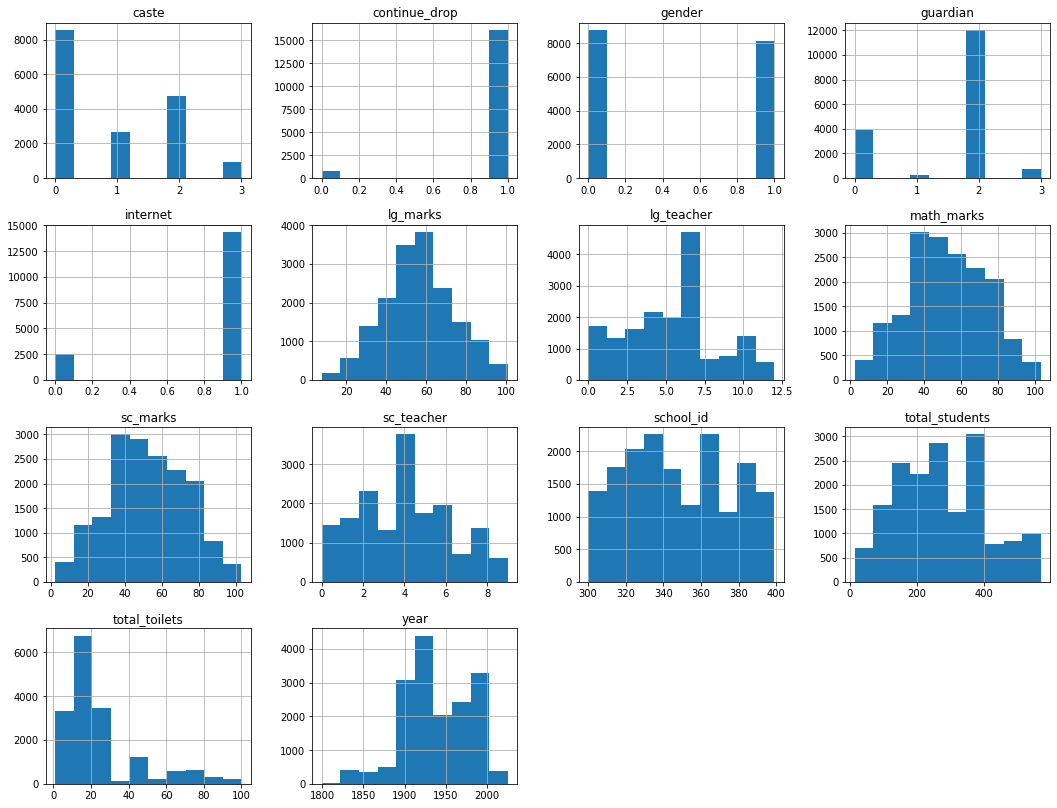

In [54]:
## using to visualize by histogram
df_contdrop.hist(figsize=(18,14));

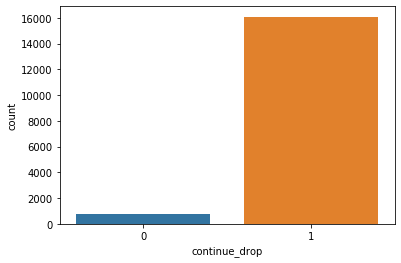

In [55]:
## Using seaborn to look for data relationships
sns.countplot(x='continue_drop', data=df_contdrop)

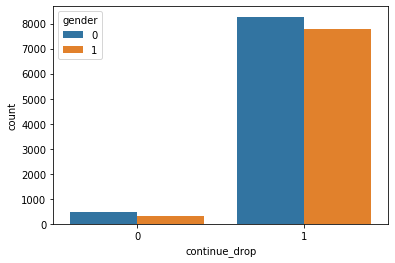

In [56]:
## Using seaborn to look for data relationship btn contidrop and gender
sns.countplot(x='continue_drop', hue='gender', data=df_contdrop)

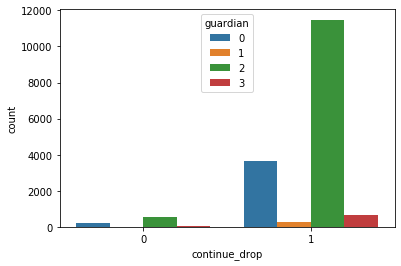

In [57]:
## Using seaborn to look for data relationships btn continue_drop and mother
sns.countplot(x='continue_drop', hue='guardian', data=df_contdrop)

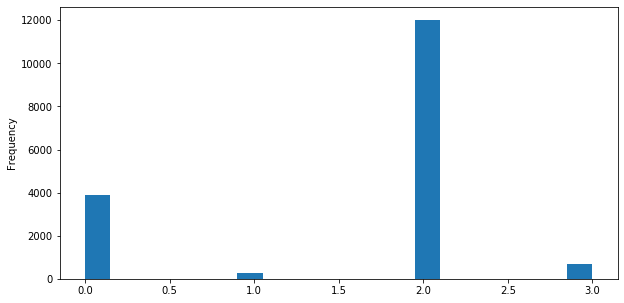

In [58]:
df_contdrop['guardian'].plot.hist(bins=20, figsize=(10,5))

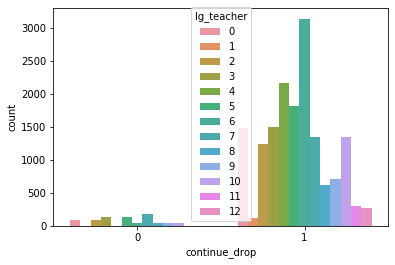

In [59]:
## Using seaborn to look for data relationships
sns.countplot(x='continue_drop', hue='lg_teacher', data=df_contdrop)

In [60]:
## Using seaborn to look for data relationships
df_contdrop['lg_teacher'].value_counts()

6     3185
4     2171
5     1959
3     1629
0     1579
7     1525
10    1386
2     1322
9      751
8      675
11     306
12     265
1      125
Name: lg_teacher, dtype: int64

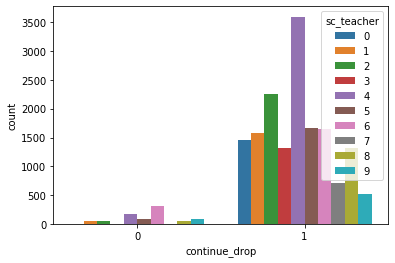

In [61]:
## Using seaborn to look for data relationships with science teacher
sns.countplot(x='continue_drop', hue='sc_teacher', data=df_contdrop)

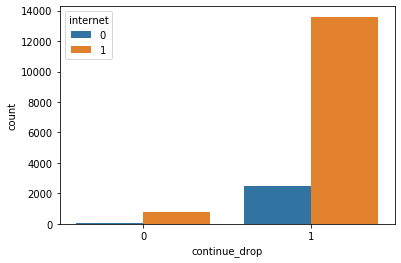

In [62]:
sns.countplot(x='continue_drop', hue='internet', data=df_contdrop)

## Training model

And check for the imbalance of data

In [63]:
features = ['gender','caste','math_marks','lg_marks','sc_marks','sc_teacher','lg_teacher','guardian','internet','school_id','total_students','total_toilets','year']

In [64]:
clas = ['continue_drop']

In [65]:
X = df_contdrop[features]
y = df_contdrop[clas]


In [66]:
print(X.shape,y.shape)

(16878, 13) (16878, 1)


Text(0, 0.5, 'Frequency')

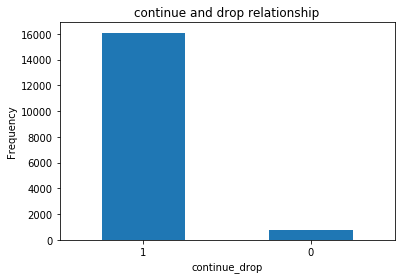

In [67]:
count_classes = pd.value_counts(df_contdrop['continue_drop'],sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title('continue and drop relationship')
#plt.xticks(range(2), LABELS)
plt.xlabel('continue_drop')
plt.ylabel('Frequency')

In [68]:
continu = df_contdrop[df_contdrop['continue_drop']==1]
drop = df_contdrop[df_contdrop['continue_drop']==0]

In [69]:
print(continu.shape,drop.shape)

(16079, 14) (799, 14)


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=1234)

#### using oversampling techniques of ratio =0.5 to overcome bad prediction

In [72]:
from imblearn.over_sampling import SMOTE
over = SMOTE(ratio=0.5)
X_over,y_over = over.fit_sample(X_train,y_train)

Using TensorFlow backend.


In [73]:
print(X_over.shape,y_over.shape)

(18078, 13) (18078,)


In [74]:
from collections import Counter
print('Original dataset shape: {}'.format(Counter(y)))
print('Resampled dataset shape: {}'.format(Counter(y_over)))

Original dataset shape: Counter({'continue_drop': 1})
Resampled dataset shape: Counter({1: 12052, 0: 6026})


##### Using differents algorithms to check performance of training data

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score


In [76]:
models = []

models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('SVC', SVC(gamma='scale')))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))

In [77]:
from imblearn.over_sampling import SMOTE
over = SMOTE(ratio=0.5)
X_over,y_over = over.fit_sample(X_train,y_train)

names = []
scores = []

for name, model in models:
    model.fit(X_over, y_over)
    y_pred = model.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    names.append(name)

results = pd.DataFrame({'Model': names, 'Accuracy': scores})
results

,Model,Accuracy
0,LR,0.901416
1,KNN,0.919573
2,DT,0.999254
3,RF,1.000000
4,SVC,0.976598
5,GB,0.998636
6,GNB,0.842833


### Using K-fold cross validation

In [78]:
folds = StratifiedKFold(n_splits=10, random_state=1234)

In [79]:
names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=folds, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

results = pd.DataFrame({'Model': names, 'Accuracy': scores})
results

,Model,Accuracy
0,LR,0.952660
1,KNN,0.948987
2,DT,1.000000
3,RF,1.000000
4,SVC,0.952660
5,GB,0.999763
6,GNB,0.952779


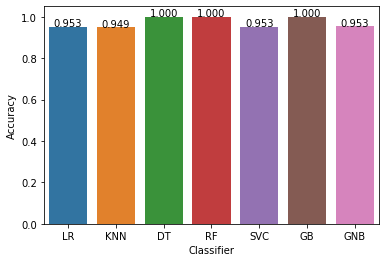

In [80]:
axis = sns.barplot(x ='Model', y ='Accuracy', data = results)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.0005, '{:1.3f}'.format(height), ha="center") 
    
plt.show()

In [81]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
pre = gb.predict(test)
pre

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
outcome = pd.Series(pre)

In [84]:
outcome.value_counts()

1    1791
0      93
dtype: int64

In [91]:
outcome.to_csv('outcome_of_challenge_1.ipynb',index=False)